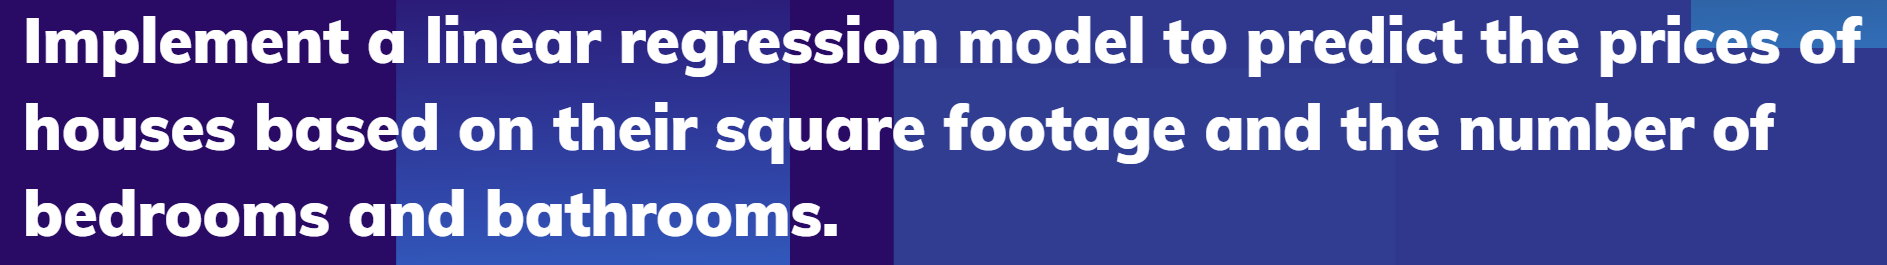

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np 
import pandas  as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# LOADING THE DATASET

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(545, 13)

In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [10]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [11]:
df['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [12]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [13]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [14]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [15]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [16]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [17]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [18]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [19]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

# VISUALIZATION

**PAIRPLOT**

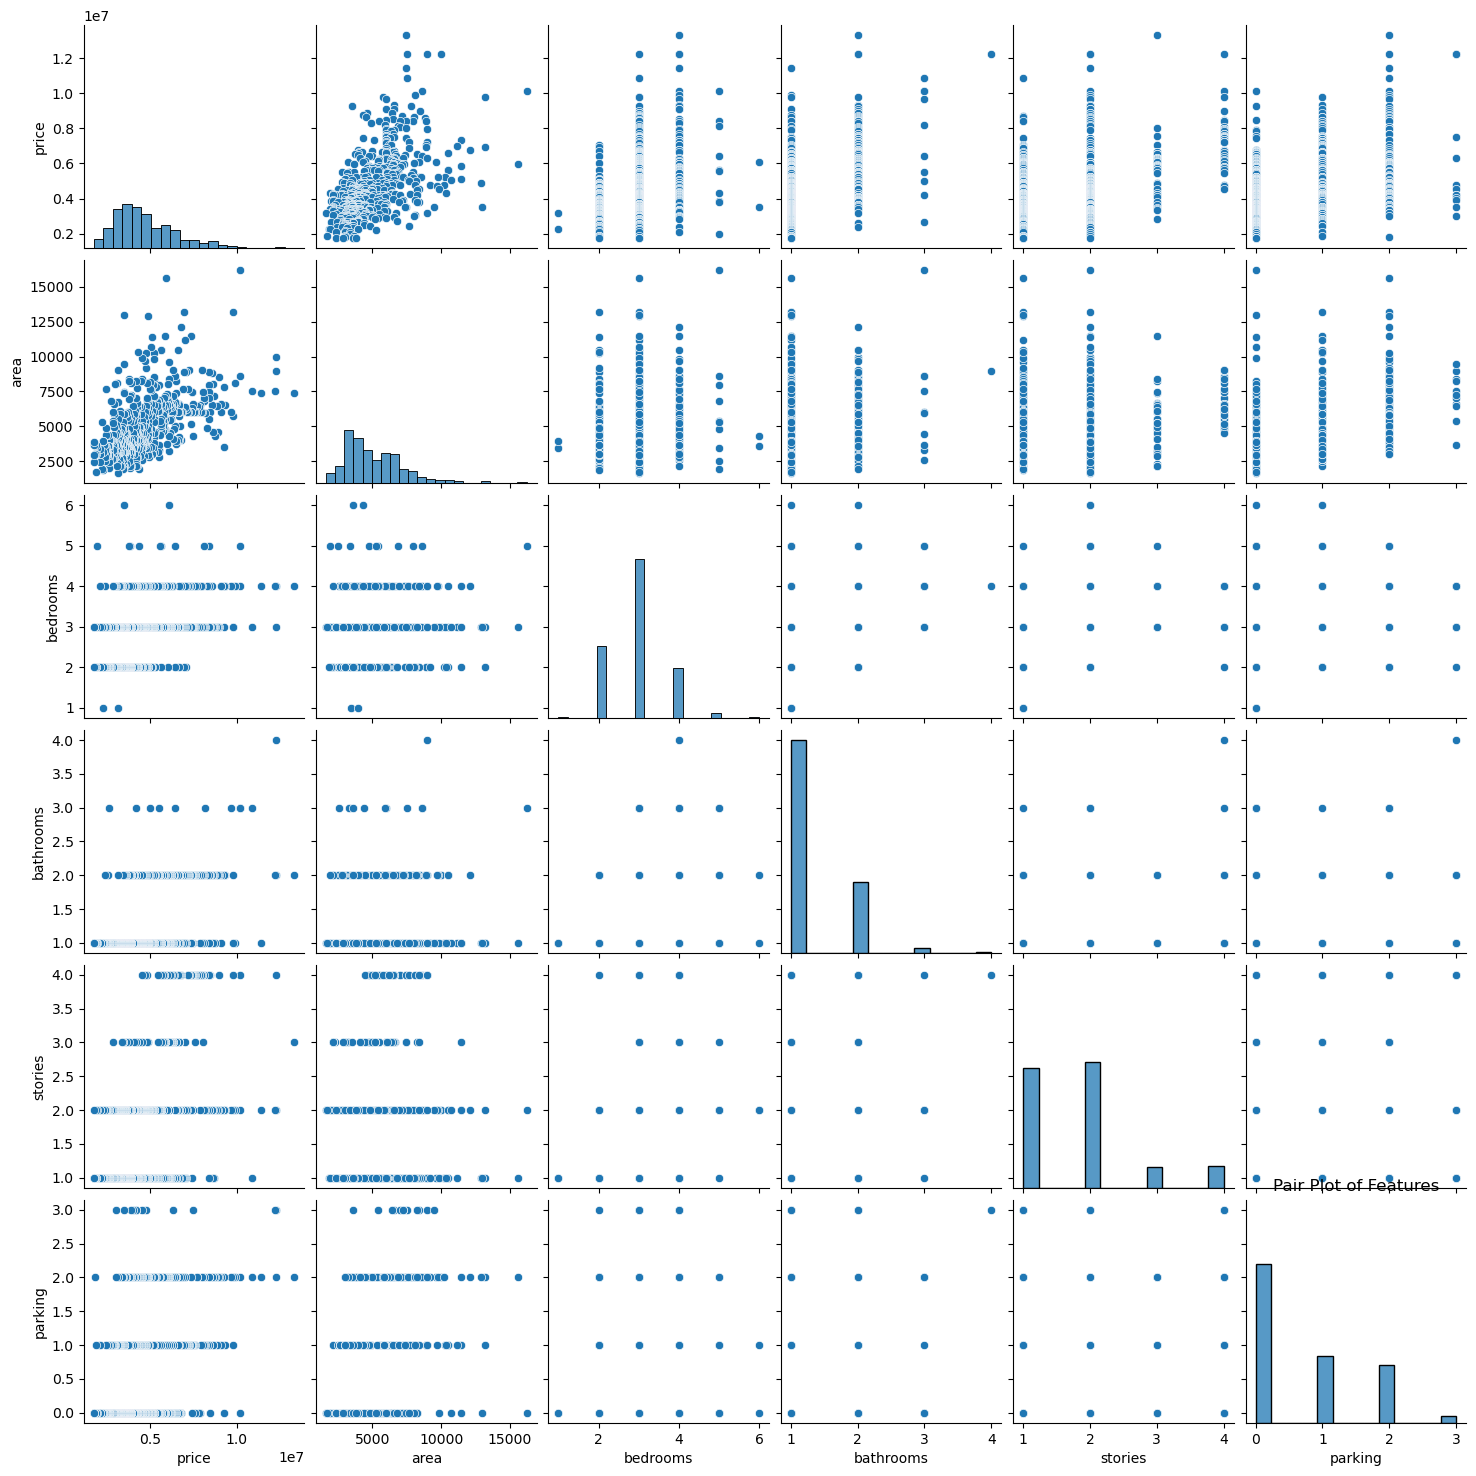

In [20]:
sns.pairplot(data = df)
plt.title('Pair Plot of Features')
plt.show()

**PIE CHART**

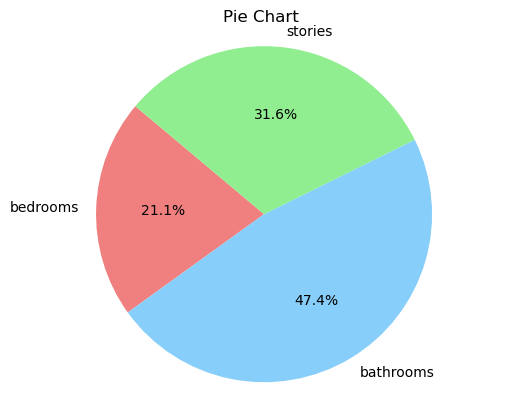

In [21]:
labels = ['bedrooms', 'bathrooms', 'stories']
sizes = [20, 45,30]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart ')
plt.show()

# MODEL BUILDING

**THE AIM IS TO PREDICT THE PRICE OF THE HOUSE BASED ON SQUARE FOOTAGE AND NUMBER OF BEDROOMS AND BATHROOMS**

**SPLITTING THE DATASET INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [22]:
x = df.iloc[:,0:4]

In [23]:
x.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [24]:
y = df['price']

In [25]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

**SPLITTING THE TESTING AND TRAINING DATA**

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state =1)

In [27]:
x_train.shape

(381, 4)

In [28]:
x_test.shape

(164, 4)

In [29]:
y_train.shape

(381,)

In [30]:
y_test.shape

(164,)

**LINEAR REGRESSION**

In [31]:
scores = []

In [32]:
lr_model = LinearRegression()

<IPython.core.display.Javascript object>

In [33]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [34]:
lr_pred = lr_model.predict(x_test)

In [35]:
lr_model_train_score = lr_model.score(x_train,y_train)
lr_model_train_score

1.0

In [36]:
lr_model_test_score = lr_model.score(x_test,y_test)
lr_model_test_score

1.0

In [37]:
scores.append(("The accuracy using Linear regression is " + str(lr_model_test_score.round(3)*100)) + ' %')

**DECISION TREE REGRESSOR**

In [38]:
dTree = DecisionTreeRegressor(criterion='friedman_mse',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=1)

In [39]:
dTree.predict(x_test)

array([ 7035000.,  4550000.,  5600000.,  6107500.,  2975000.,  3780000.,
        2450000.,  7455000.,  2940000.,  6419000.,  2800000.,  3290000.,
        5810000.,  5950000.,  6790000., 12250000.,  3640000.,  2870000.,
        5460000.,  1890000.,  3780000.,  5600000.,  2660000.,  3640000.,
        2590000.,  5250000.,  2450000.,  7000000.,  9310000.,  3430000.,
        7910000.,  5950000.,  3430000.,  2975000.,  6090000.,  4655000.,
        4550000.,  3255000.,  5810000.,  4760000.,  3360000.,  2940000.,
        2450000.,  4375000.,  8080940.,  4893000.,  4200000.,  4200000.,
        3332000.,  3115000.,  5215000.,  4473000.,  3115000.,  4060000.,
        4760000.,  4620000.,  2940000.,  4403000.,  4550000.,  3920000.,
        5803000.,  8400000.,  3570000.,  4165000.,  4620000.,  2590000.,
        4130000.,  2100000.,  2380000.,  4830000.,  3395000.,  5040000.,
        5250000.,  2590000.,  6790000.,  3850000.,  1855000., 12215000.,
        5950000.,  3780000.,  3640000.,  4515000., 

In [40]:
dTree_train_score = dTree.score(x_train,y_train)
dTree_train_score 

1.0

In [41]:
dTree_test_score = dTree.score(x_test,y_test)
dTree_test_score 

0.9918235672495025

In [42]:
scores.append(("The accuracy using Decision Tree Regressor is " + str(dTree_test_score.round(3)*100)) + ' %')

**BAGGING REGRESSOR**

In [43]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(estimator=dTree,n_estimators = 50,random_state =1)
bgcl = bgcl.fit(x_train,y_train)

In [44]:
bgcl.predict(x_test)

array([ 7078960. ,  4548460. ,  5614000. ,  6113240. ,  2944200. ,
        3779300. ,  2454900. ,  7430500. ,  2938600. ,  6437340. ,
        2813650. ,  3331160. ,  5807200. ,  5946920. ,  6797000. ,
       11889500. ,  3640700. ,  2861950. ,  5448660. ,  1869700. ,
        3779300. ,  5598250. ,  2660840. ,  3640000. ,  2611980. ,
        5251260. ,  2454900. ,  7006300. ,  9544500. ,  3429720. ,
        7922076.4,  5948180. ,  3429720. ,  2944200. ,  6092450. ,
        4611880. ,  4548180. ,  3230920. ,  5807200. ,  4768820. ,
        3359860. ,  2938600. ,  2465400. ,  4387040. ,  8058075.2,
        4886840. ,  4201400. ,  4201400. ,  3290000. ,  3121370. ,
        5217520. ,  4475940. ,  3123813. ,  4058320. ,  4768120. ,
        4612440. ,  2954560. ,  4402300. ,  4550280. ,  3922800. ,
        5772130. ,  8405740. ,  3578400. ,  4160170. ,  4609640. ,
        2614780. ,  4127970. ,  2111620. ,  2390640. ,  4830000. ,
        3396820. ,  5040700. ,  5249160. ,  2611980. ,  677530

In [45]:
bgcl_train_score = bgcl.score(x_train,y_train)
bgcl_train_score

0.9997637119990307

In [46]:
bgcl_test_score = bgcl.score(x_test,y_test)
bgcl_test_score

0.994607428401128

In [47]:
scores.append(("The accuracy using Bagging Regressor is " + str(bgcl_test_score.round(3)*100))+ ' %')

**RANDOM FOREST REGRESSOR**

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 50 , random_state = 1 , max_features =12)
rfcl = rfcl.fit(x_train,y_train)

In [49]:
rfcl.predict(x_test)

array([ 7078260. ,  4545660. ,  5609100. ,  6106870. ,  2941610. ,
        3779720. ,  2453500. ,  7439600. ,  2941400. ,  6446300. ,
        2815750. ,  3330460. ,  5811540. ,  5946220. ,  6792800. ,
       12077100. ,  3639300. ,  2861250. ,  5443060. ,  1879843. ,
        3779720. ,  5598600. ,  2659440. ,  3637900. ,  2611140. ,
        5251120. ,  2457000. ,  7004900. ,  9597700. ,  3431120. ,
        7920606.4,  5948460. ,  3431120. ,  2941750. ,  6089160. ,
        4613280. ,  4547060. ,  3237500. ,  5811540. ,  4771620. ,
        3359860. ,  2938250. ,  2460500. ,  4386200. ,  8062835.2,
        4886560. ,  4200700. ,  4200000. ,  3288180. ,  3118521. ,
        5217520. ,  4474540. ,  3120684. ,  4060000. ,  4770920. ,
        4611460. ,  2957360. ,  4402160. ,  4548320. ,  3921400. ,
        5779200. ,  8412740. ,  3574900. ,  4160800. ,  4607400. ,
        2613940. ,  4124540. ,  2112880. ,  2392180. ,  4829440. ,
        3396820. ,  5037620. ,  5250420. ,  2611140. ,  677180

In [50]:
rfcl_train_score = rfcl.score(x_train,y_train)
rfcl_train_score

0.9999097605604862

In [51]:
rfcl_test_score = rfcl.score(x_test,y_test)
rfcl_test_score

0.9950500891363295

In [52]:
scores.append(("The accuracy using Random Forest Regressor is " + str(rfcl_test_score.round(3)*100))+ ' %')

**XGB REGRESSOR**

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators=50,random_state=1)
gbcl = gbcl.fit(x_train,y_train)

In [54]:
gbcl.predict(x_test)

array([ 7072121.47401632,  4534124.0893953 ,  5595438.09464339,
        6087493.82823025,  2962256.46291936,  3776977.44974936,
        2470057.11083026,  7433605.12412396,  2962256.46291936,
        6418071.28610982,  2830447.57572227,  3340399.75639979,
        5804553.457219  ,  5945381.65274173,  6788315.97297894,
       12190426.53297112,  3643192.84139695,  2868265.97253474,
        5489829.7356746 ,  1918620.71163811,  3776977.44974936,
        5595438.09464339,  2673472.95629602,  3643192.84139695,
        2603865.21868111,  5246630.18916187,  2470057.11083026,
        6987228.18564519,  9763434.90441825,  3433145.88686756,
        7892754.96005778,  5945381.65274173,  3433145.88686756,
        2962256.46291936,  6082902.59589214,  4625533.32004638,
        4534124.0893953 ,  3235281.42494191,  5804553.457219  ,
        4757179.24655872,  3367528.86155127,  2962256.46291936,
        2470057.11083026,  4395063.61944457,  8066577.64635539,
        4891423.97796668,  4201484.33625

In [55]:
gbcl_train_score = gbcl.score(x_train,y_train)
gbcl_train_score

0.9999331175959824

In [56]:
gbcl_test_score = gbcl.score(x_test,y_test)
gbcl_test_score

0.9962769268613361

In [57]:
scores.append(("The accuracy using XGB Regressor is " + str(gbcl_test_score.round(3)*100))+ ' %')

In [58]:
scores

['The accuracy using Linear regression is 100.0 %',
 'The accuracy using Decision Tree Regressor is 99.2 %',
 'The accuracy using Bagging Regressor is 99.5 %',
 'The accuracy using Random Forest Regressor is 99.5 %',
 'The accuracy using XGB Regressor is 99.6 %']